### Download the Dataset + Create Dataframe

In [5]:
%%bash
mkdir -p data

files=("goemotions_1.csv" "goemotions_2.csv" "goemotions_3.csv")
base_url="https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/"

for file in "${files[@]}"; do
    if [ ! -f "data/$file" ]; then
        wget -P data/ "${base_url}${file}"
    fi
done

In [3]:
import pandas as pd

df1 = pd.read_csv("data/goemotions_1.csv")
df2 = pd.read_csv("data/goemotions_2.csv")
df3 = pd.read_csv("data/goemotions_3.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

### Drop useless Columns

In [1]:
positive = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
negative = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']
ambiguous = ['confusion', 'curiosity', 'realization', 'surprise']

emotions = positive + negative + ambiguous
print(f"Number of different emotions: {len(emotions)}")

Number of different emotions: 27


In [7]:
columns_to_drop = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'neutral']
# TODO: Je ne sais pas vraiment à quel point les deux colonnes 'example_very_unclear' et 'neutral' sont utiles.
# Pour le moment elles sont supprimées comme les autres.
df_filtered = df.drop(columns=columns_to_drop)

### Show the Distribution of the different Emotions

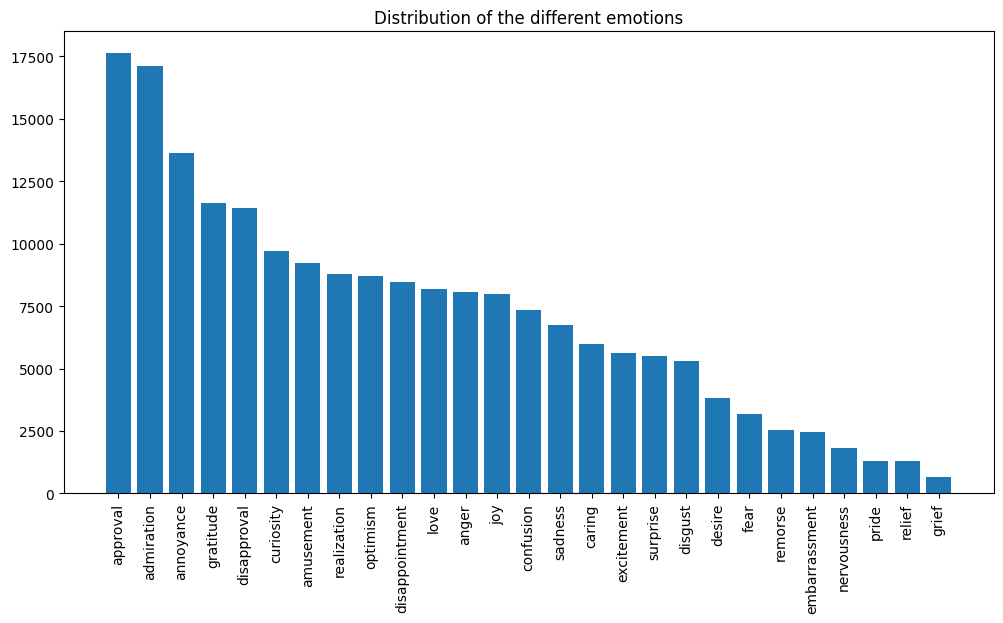

In [5]:
import matplotlib.pyplot as plt

emotions_count = df_filtered[emotions].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(emotions_count.index, emotions_count.values)
plt.xticks(rotation=90)
plt.title("Distribution of the different emotions")
plt.show()